# STROKE DECISION SUPPORT SYSTEM ICA 2

In [1]:
#Importation of Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report



#This importation is to ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Importation and Loading of Datasets
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# STATISTICAL ANALYSIS

In [3]:
#Shape of the Datsaset Showing the Number of Rows and Columns
df.shape

(5110, 11)

In [4]:
#Checking the number of categorical columns in the dataset
#We have five categorical column in the dataset 
cat = df.select_dtypes(include='object').columns
print ("There are " ,len(cat), "categorical column in the dataset :\n", cat)

There are  5 categorical column in the dataset :
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [5]:
#Checking the number of Numberical columns in the dataset
numer = df.select_dtypes(include=np.number).columns
print ("There are",len(numer), "Numerical column in the dataset which are the independent variables:\n", numer)

There are 6 Numerical column in the dataset which are the independent variables:
 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


In [6]:
#details of the last 5 rows of the dataset  
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
#Checking for Duplicate values
df.duplicated() .sum()  
print("There are", df.duplicated() .sum(), "duplicate values in the dataset")

There are 0 duplicate values in the dataset


In [8]:
#Summary of the Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [9]:
#Description of the Dataset showing the Mean, Median, Mode, Standard Deviation, Minimum and Maximum Values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


# DATA PREPROCESSING

In [10]:
#Checking for Missing Values in the Dataset using Columns
print (df.isnull().sum())
print("There are", df.isnull().sum().sum(), "missing values in the dataset")    

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
There are 201 missing values in the dataset


# FILLING MISSING VLAUES IN THE BMI 

In [11]:
### Since the values are numerical, we will fill the mssing values with the mean value of the BMI column
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#This has two unique values which are Benign (B) and Malignant (M)
df['stroke'].unique()

array([1, 0])

#### we have 2 unique values in the output variable which is 1 (means the patient is likely to have stroke due to their lifestyle) and 0 (means not likely to have stroke becaus of their lifestyle)

# EXPLORATORY DATA ANALYSIS

In [13]:
# Check unique values in categorical columns
try:
    cat_cols = cat  
except NameError:
    cat_cols = df.select_dtypes(include=['object','category']).columns

print("Categorical columns and their unique value counts:")
for col in cat_cols:
    print(f"{col} has: {df[col].nunique()} unique values -> {df[col].unique()}")

Categorical columns and their unique value counts:
gender has: 3 unique values -> ['Male' 'Female' 'Other']
ever_married has: 2 unique values -> ['Yes' 'No']
work_type has: 5 unique values -> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type has: 2 unique values -> ['Urban' 'Rural']
smoking_status has: 4 unique values -> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


#### The above shows the catogorical values that will be transformed to numberical data for training.

In [14]:
stroke = df['stroke'].value_counts()
print(stroke)
print("Percentage of patience to develop Stroke (1): "+str(round(stroke[1]*100/5110,2)) +" %")
print("Percentage of patience not to develop Stroke (0): "+str(round(stroke[0]*100/5110,2))+ " %")

stroke
0    4861
1     249
Name: count, dtype: int64
Percentage of patience to develop Stroke (1): 4.87 %
Percentage of patience not to develop Stroke (0): 95.13 %


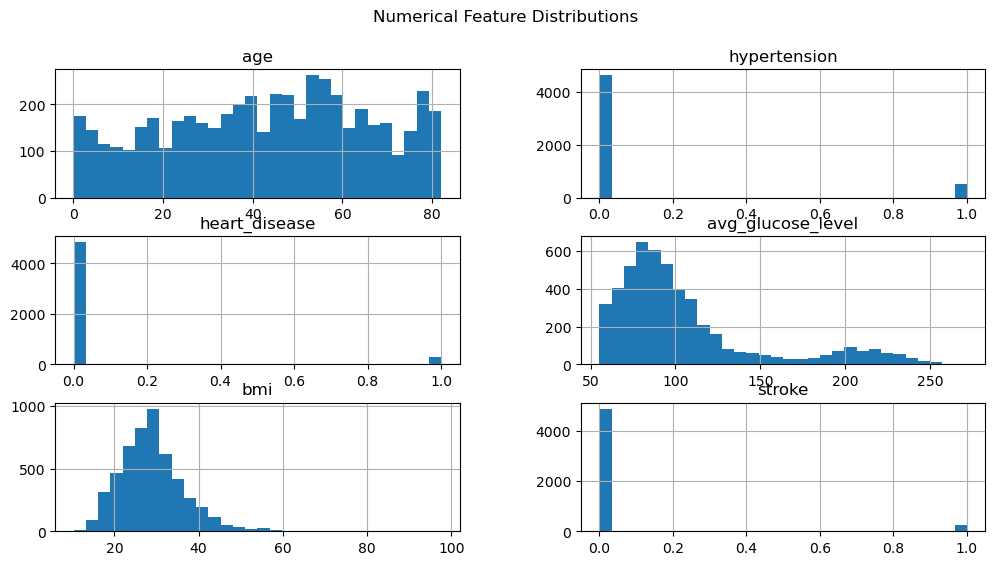

In [ ]:
#Numerical Feature Distributions Plot
dfsample = df.drop(columns=['stroke'])
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(12,6), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()

## Univariate Analysis

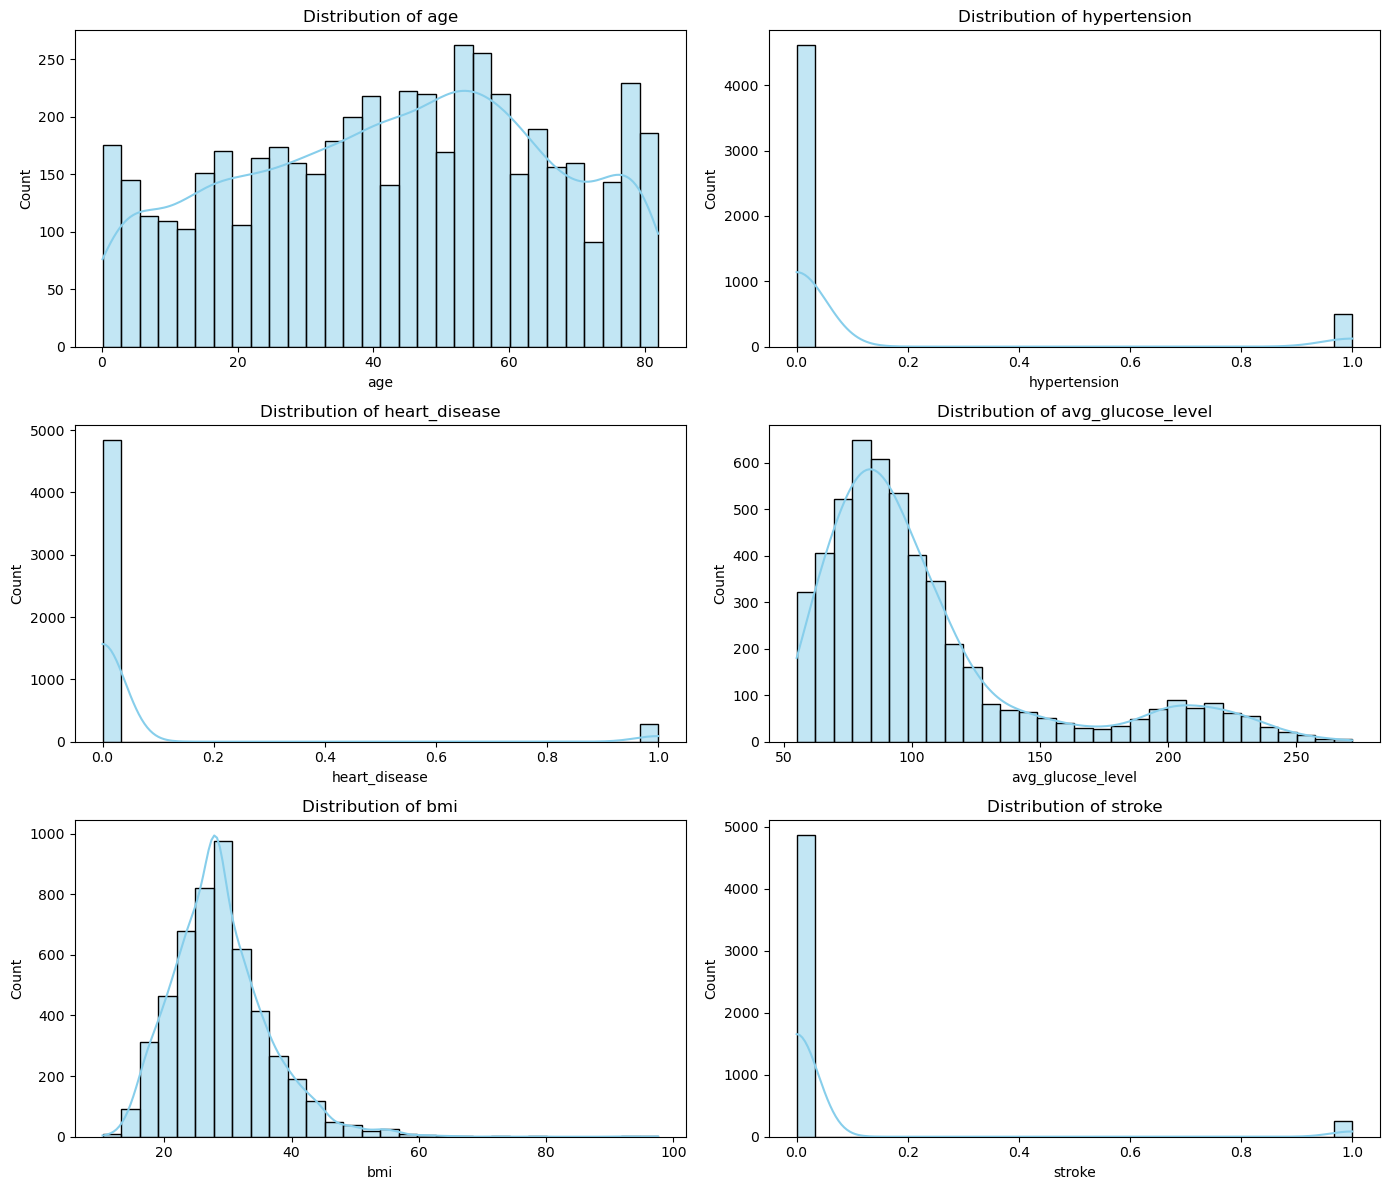

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


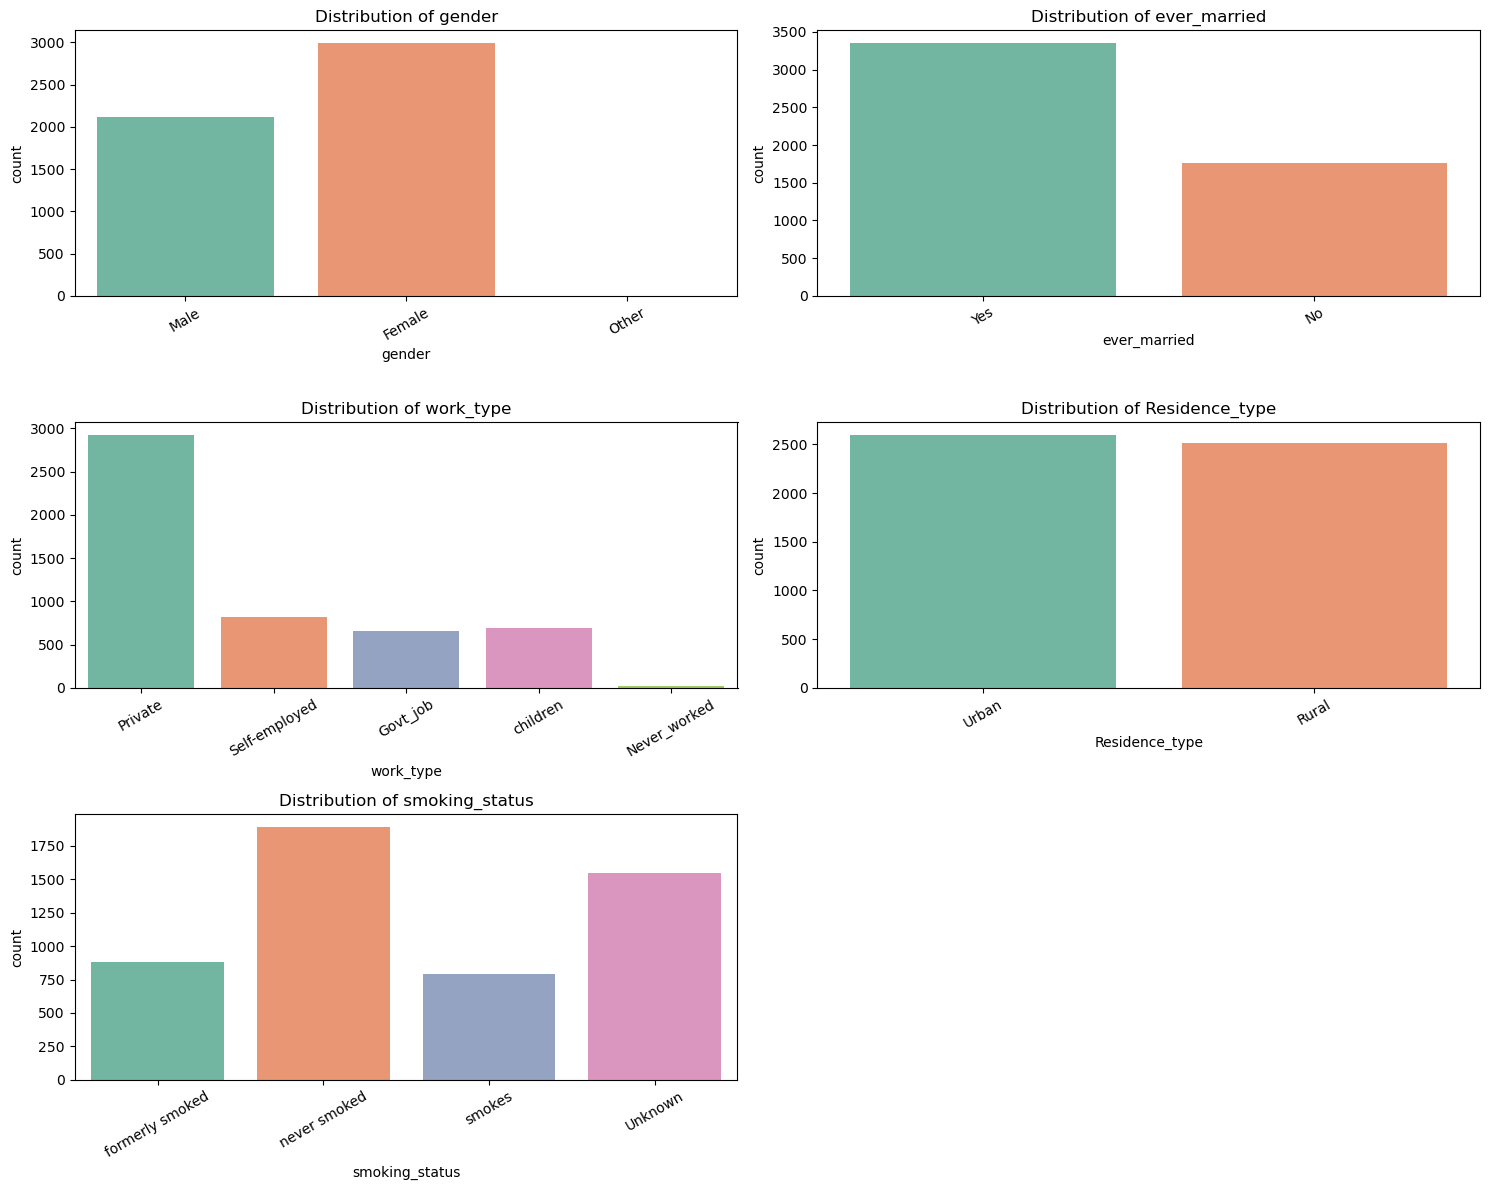

In [17]:
cat_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(15, 12))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, idx)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


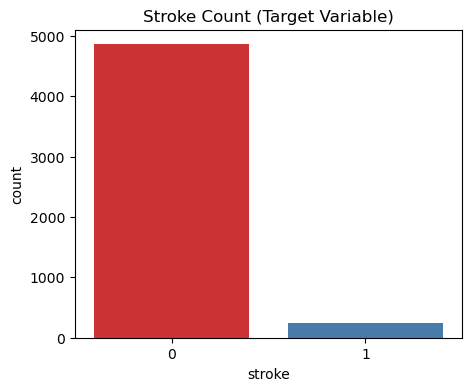

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [18]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='stroke', palette='Set1')
plt.title('Stroke Count (Target Variable)')
plt.show()

# Percentage
stroke_counts = df['stroke'].value_counts(normalize=True) * 100
print(stroke_counts)


### Bivarate Analysis

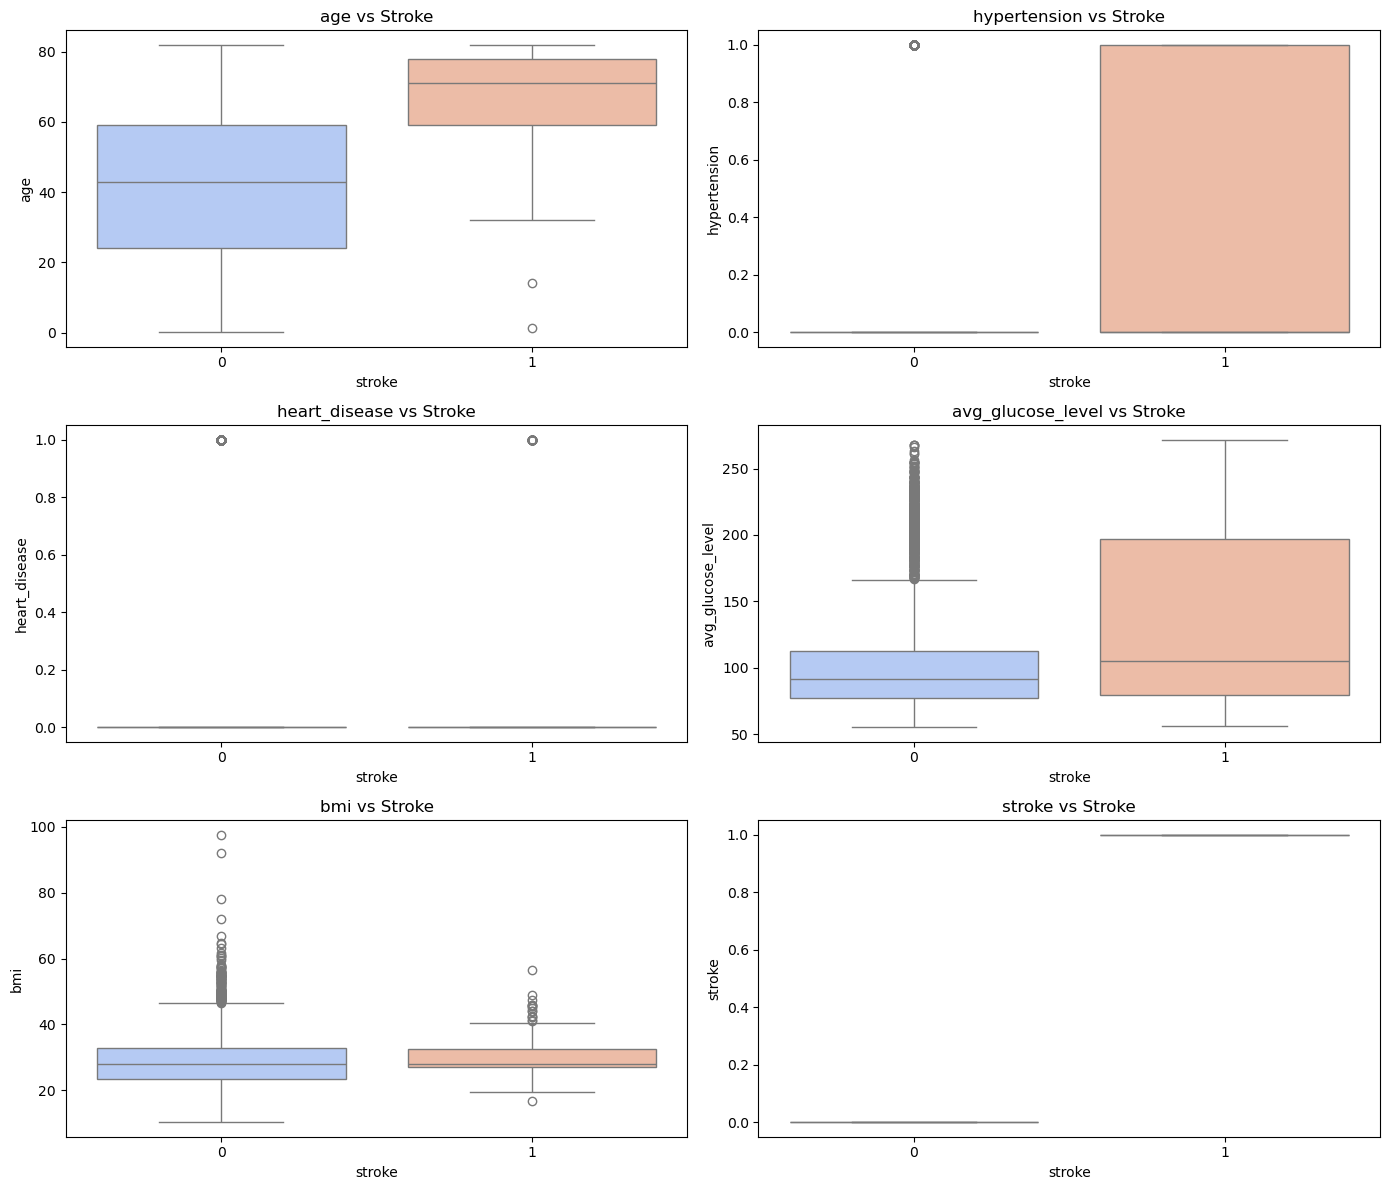

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, x='stroke', y=col, palette='coolwarm', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Stroke')

plt.tight_layout()
plt.show()


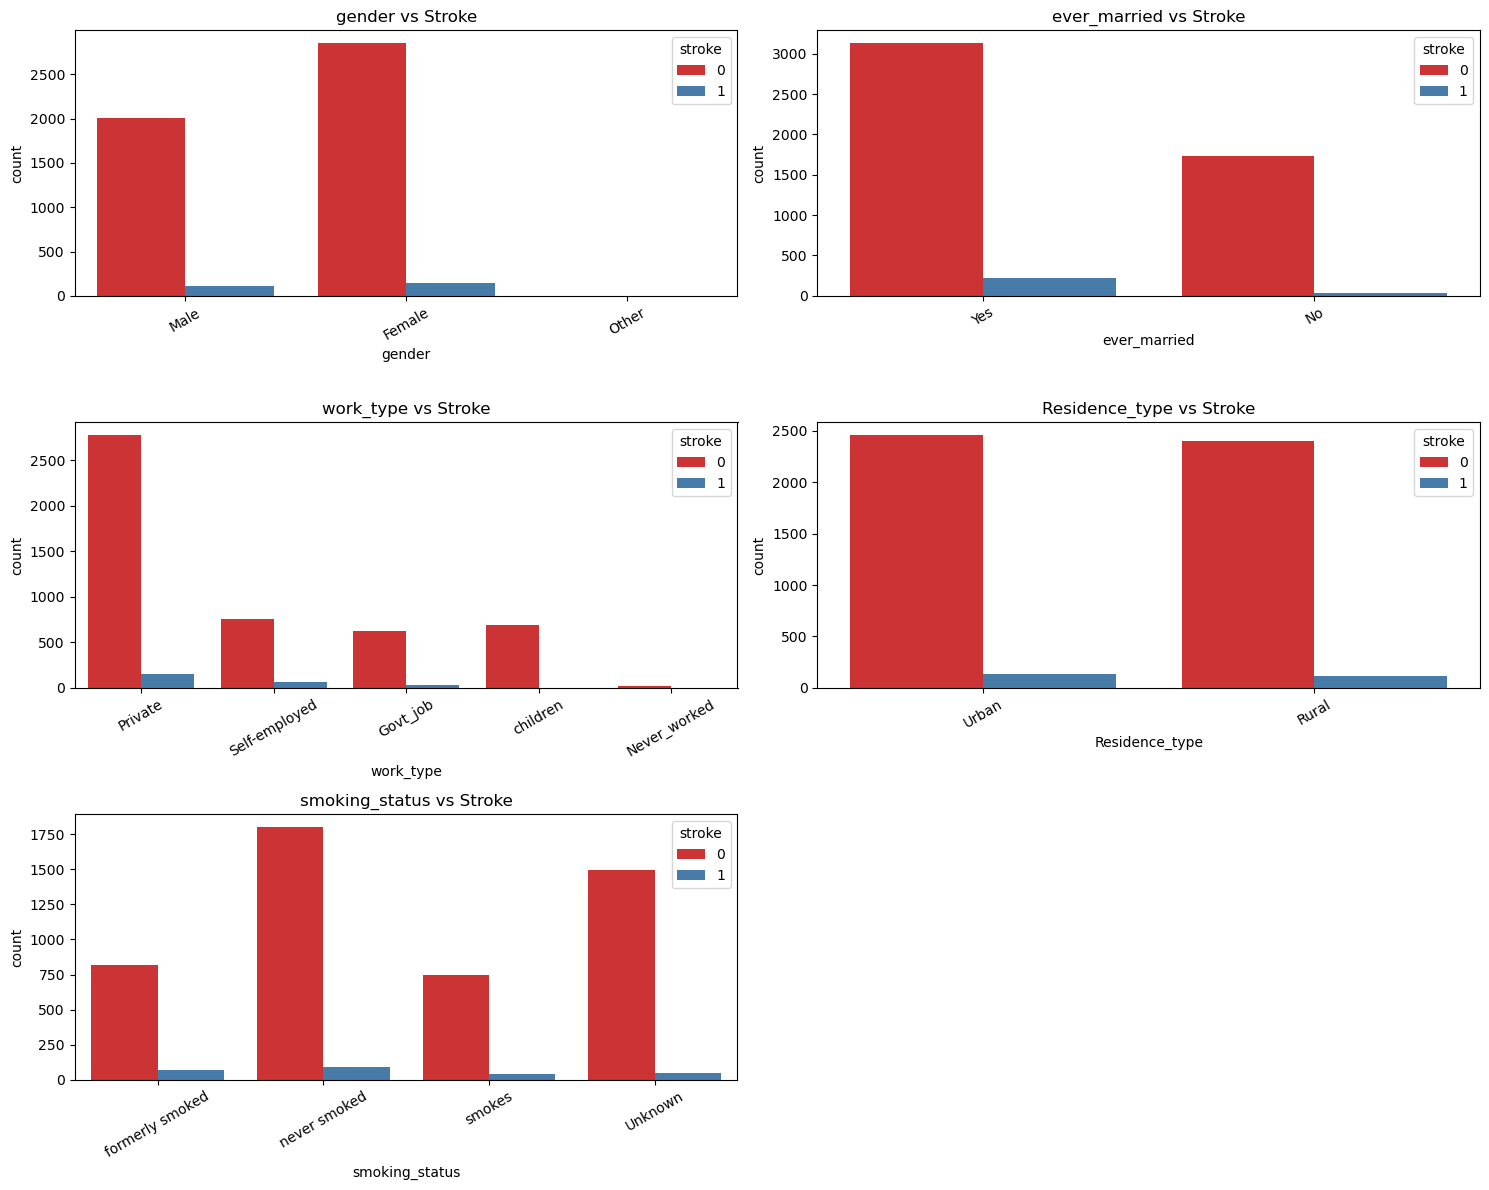

In [20]:
plt.figure(figsize=(15, 12))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, idx)
    sns.countplot(data=df, x=col, hue='stroke', palette='Set1')
    plt.title(f'{col} vs Stroke')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


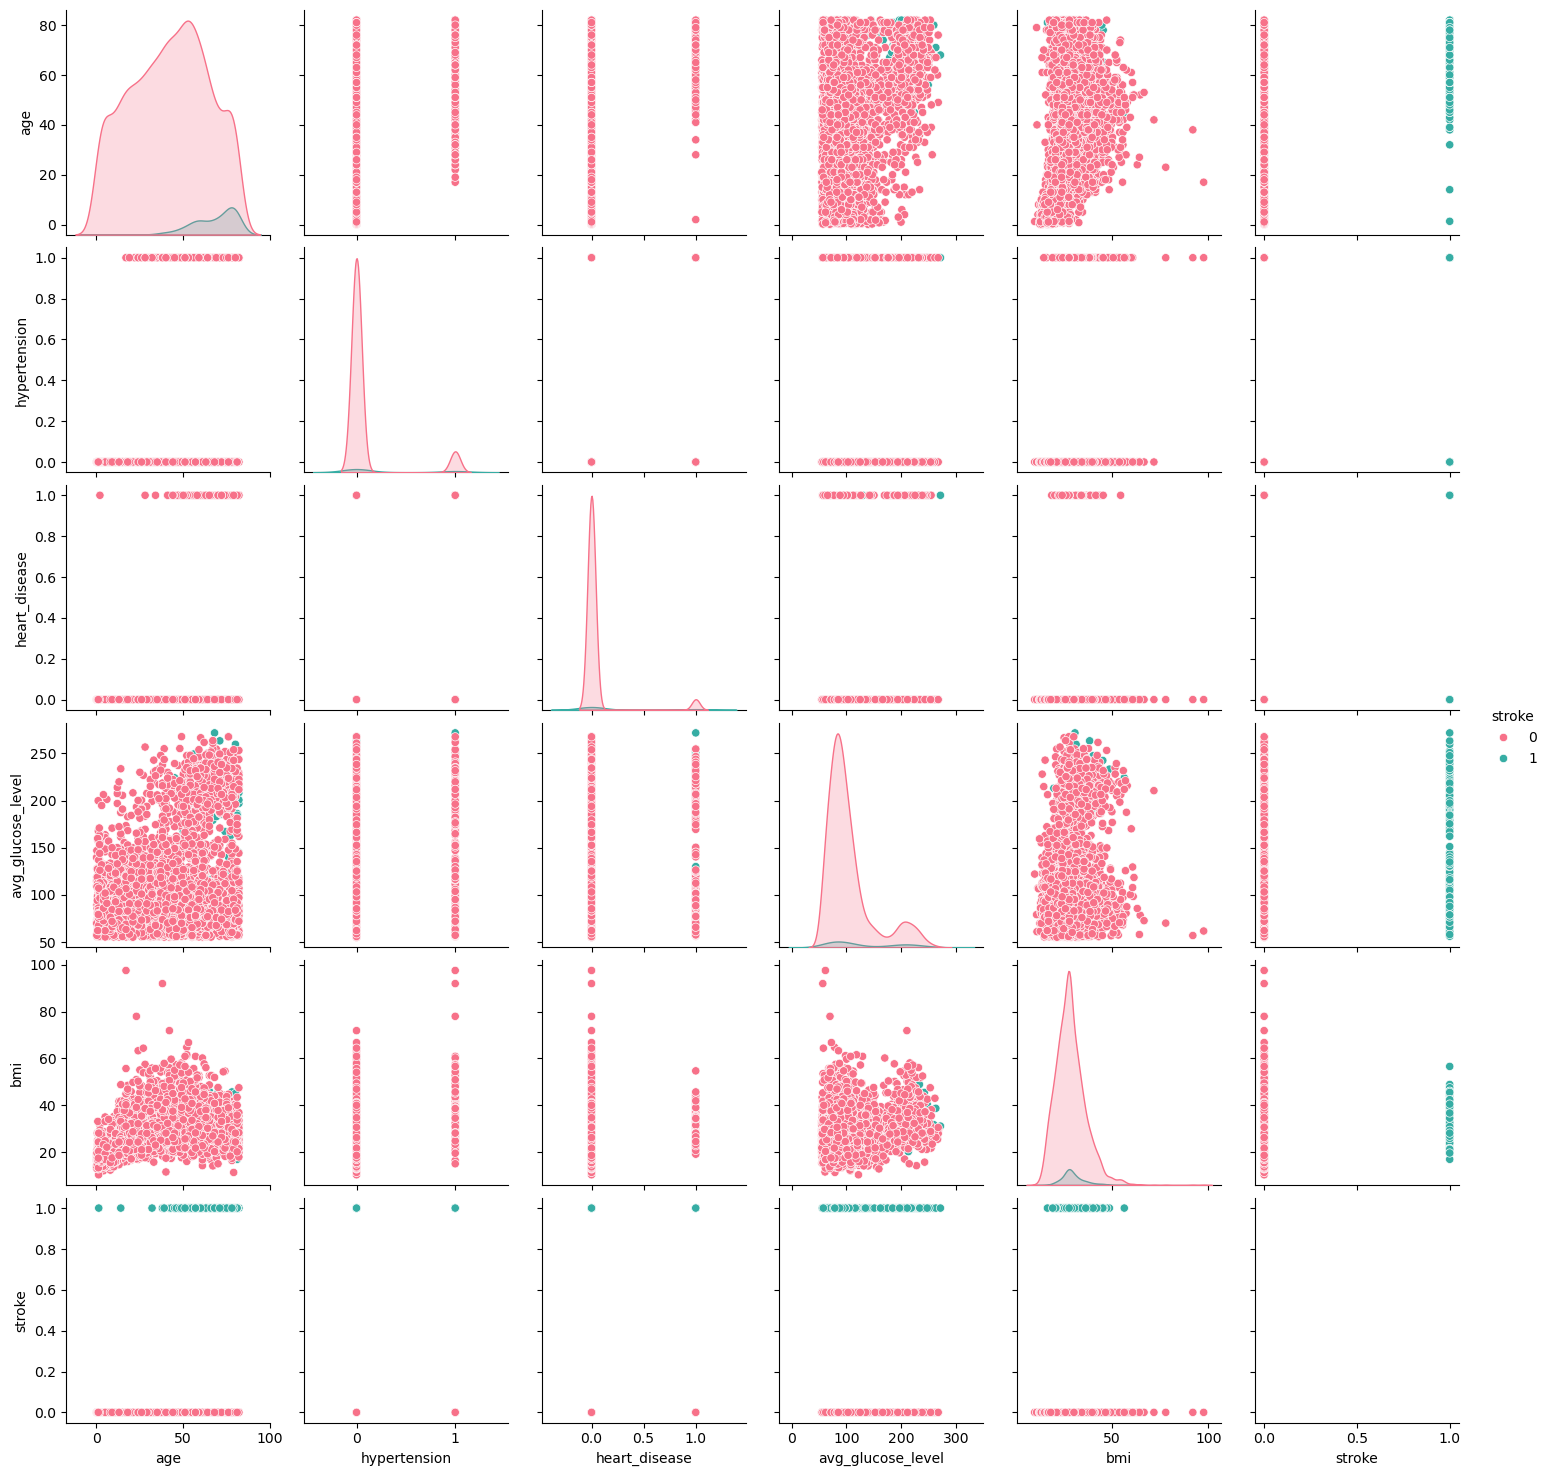

In [21]:
# Pairplot (Numerical Features vs Target)
sns.pairplot(df, vars=num_cols, hue='stroke', palette='husl')
plt.show()


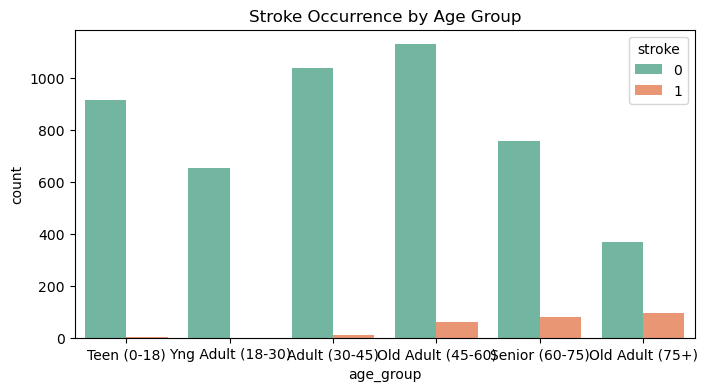

In [22]:
## Distribution by Age Groups
dfage = df.copy()
dfage['age_group'] = pd.cut(dfage['age'], bins=[0,18,30,45,60,75,100],
                         labels=['Teen (0-18)','Yng Adult (18-30)','Adult (30-45)','Old Adult (45-60)','Senior (60-75)','Old Adult (75+)'])

plt.figure(figsize=(8,4))
sns.countplot(data=dfage, x='age_group', hue='stroke', palette='Set2')
plt.title('Stroke Occurrence by Age Group')
plt.show()


# FEATURE ENGINEERING

#### Outlier Removal by setting the upper and lower quatiles

Numerical columns for outlier detection: ['age', 'avg_glucose_level', 'bmi']

Column: age
Lower bound: -29.00, Upper bound: 115.00
Number of outliers: 0

Column: avg_glucose_level
Lower bound: 21.98, Upper bound: 169.36
Number of outliers: 627

Column: bmi
Lower bound: 9.95, Upper bound: 45.55
Number of outliers: 100

Total rows before: 5110
Total rows after removing outliers: 4383
Number of rows removed: 727


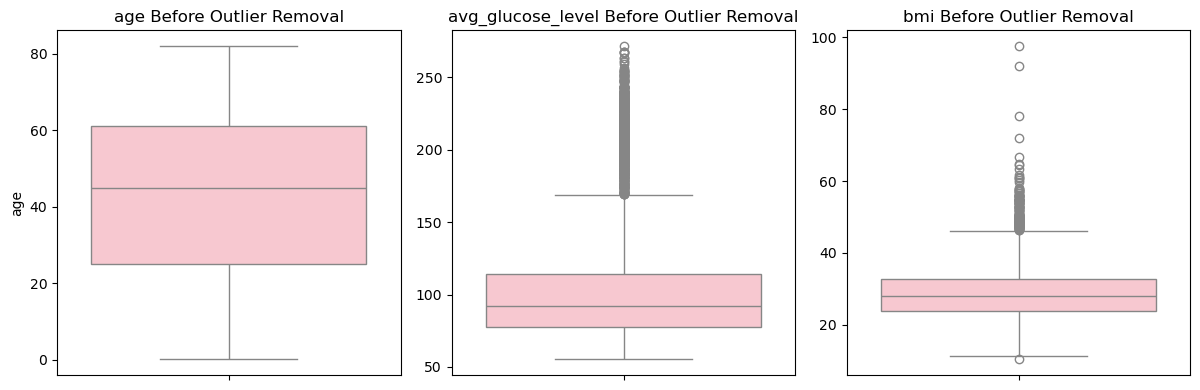

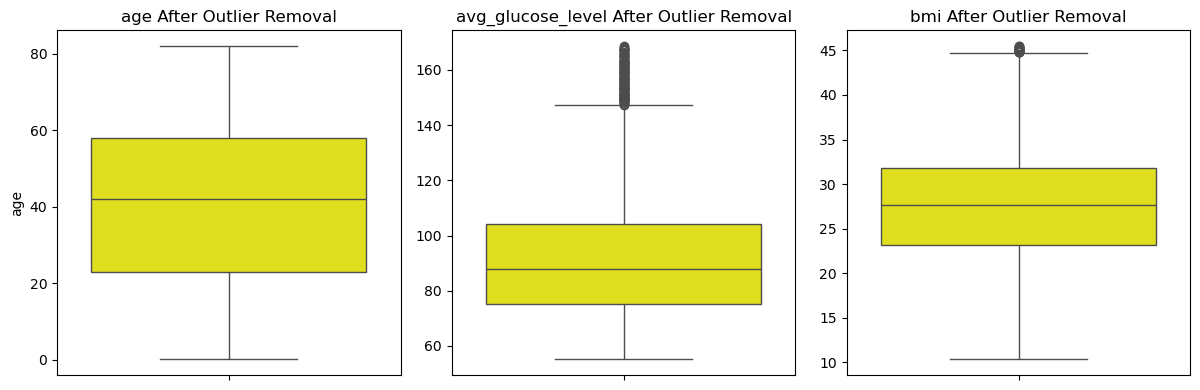

Cleaned dataset saved as 'stroke_new.csv'


In [23]:
if 'id' in df.columns:
    data = df.drop(columns=['id'])
if 'stroke' in df.columns:
    data_numeric = df.drop(columns=['stroke'])
else:
    data_numeric = data

# Select numerical columns for outlier detection
numerical_cols = num_cols = ["age", "avg_glucose_level", "bmi"]
print(f"Numerical columns for outlier detection: {numerical_cols}")

custom_palette = ['pink']
custom_palette1 = ['yellow']
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nColumn: {column}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    #print(f"Outlier values:\n{outliers}")
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, outliers

# Initialize the cleaned dataset
data_cleaned = df.copy()

# Apply outlier removal to each numerical column
for col in numerical_cols:
    data_cleaned, outliers = remove_outliers_iqr(data_cleaned, col, multiplier=1.5)

# Display the number of rows removed
rows_removed = len(df) - len(data_cleaned)
print(f"\nTotal rows before: {len(df)}")
print(f"Total rows after removing outliers: {len(data_cleaned)}")
print(f"Number of rows removed: {rows_removed}")

# --- Visualization: Box Plots Before and After for All Features in 5 Columns ---
# Before removal
n_cols = 5
n_rows_before = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns
plt.figure(figsize=(20, 4 * n_rows_before))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows_before, n_cols, i)
    sns.boxplot(data=df, y=col, palette=custom_palette)
    plt.title(f'{col} Before Outlier Removal')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row

plt.tight_layout()
plt.show()

# After removal
n_rows_after = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns
plt.figure(figsize=(20, 4 * n_rows_after))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows_after, n_cols, i)
    sns.boxplot(data=data_cleaned, y=col, palette=custom_palette1)
    plt.title(f'{col} After Outlier Removal')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row

plt.tight_layout()
plt.show()

# Save the cleaned dataset
data_cleaned.to_csv('stroke_new.csv', index=False)
print("Cleaned dataset saved as 'stroke_new.csv'")

### The New Datasets with ouliers removed is saved as stroke_new.csv which is reopened in the next line of code.

In [24]:
df = pd.read_csv('stroke_new.csv')
df.shape

(4383, 11)

In [25]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
5,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
6,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
7,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
8,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
9,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked,1


### Correlation Analysis

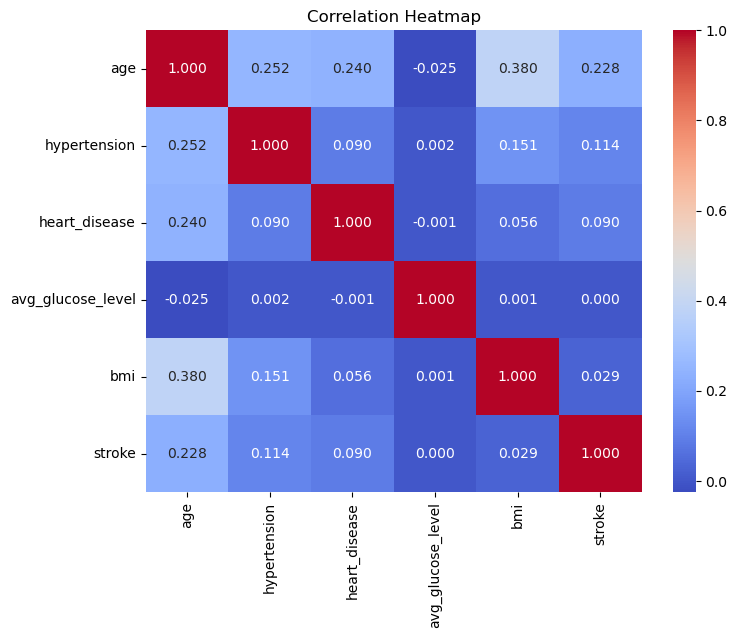

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()


In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Encoding

In [28]:
# Start from the original dataframe (before wrong encoding)


# Proper encoding of all categorical columns
# 1. Binary columns → Label Encoding (0/1)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 1})  # 'Other' is rare
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

# 2. work_type & smoking_status → One-Hot Encoding
df_final = pd.get_dummies(df, 
                          columns=['work_type', 'smoking_status'],
                          prefix=['work', 'smoking'],
                          drop_first=True)

print("Final shape:", df_final.shape)
print("Columns after encoding:")
print(df_final.columns.tolist())

df_final.head()

Final shape: (4383, 16)
Columns after encoding:
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'work_Never_worked', 'work_Private', 'work_Self-employed', 'work_children', 'smoking_formerly smoked', 'smoking_never smoked', 'smoking_smokes']


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
1,1,74.0,1,1,1,0,70.09,27.4,1,False,True,False,False,False,True,False
2,0,69.0,0,0,0,1,94.39,22.8,1,False,True,False,False,False,True,False
3,0,59.0,0,0,1,0,76.15,28.1,1,False,True,False,False,False,False,False
4,0,78.0,0,0,1,1,58.57,24.2,1,False,True,False,False,False,False,False


In [29]:
df_final.head(1000)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
0,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
1,1,74.0,1,1,1,0,70.09,27.4,1,False,True,False,False,False,True,False
2,0,69.0,0,0,0,1,94.39,22.8,1,False,True,False,False,False,True,False
3,0,59.0,0,0,1,0,76.15,28.1,1,False,True,False,False,False,False,False
4,0,78.0,0,0,1,1,58.57,24.2,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,41.0,0,0,1,0,107.18,22.8,0,False,True,False,False,False,True,False
996,1,37.0,0,0,1,0,74.58,31.6,0,False,True,False,False,False,False,False
997,0,58.0,0,0,1,1,80.92,19.4,0,False,True,False,False,False,False,False
998,0,79.0,0,0,1,0,90.77,22.5,0,False,True,False,False,False,True,False


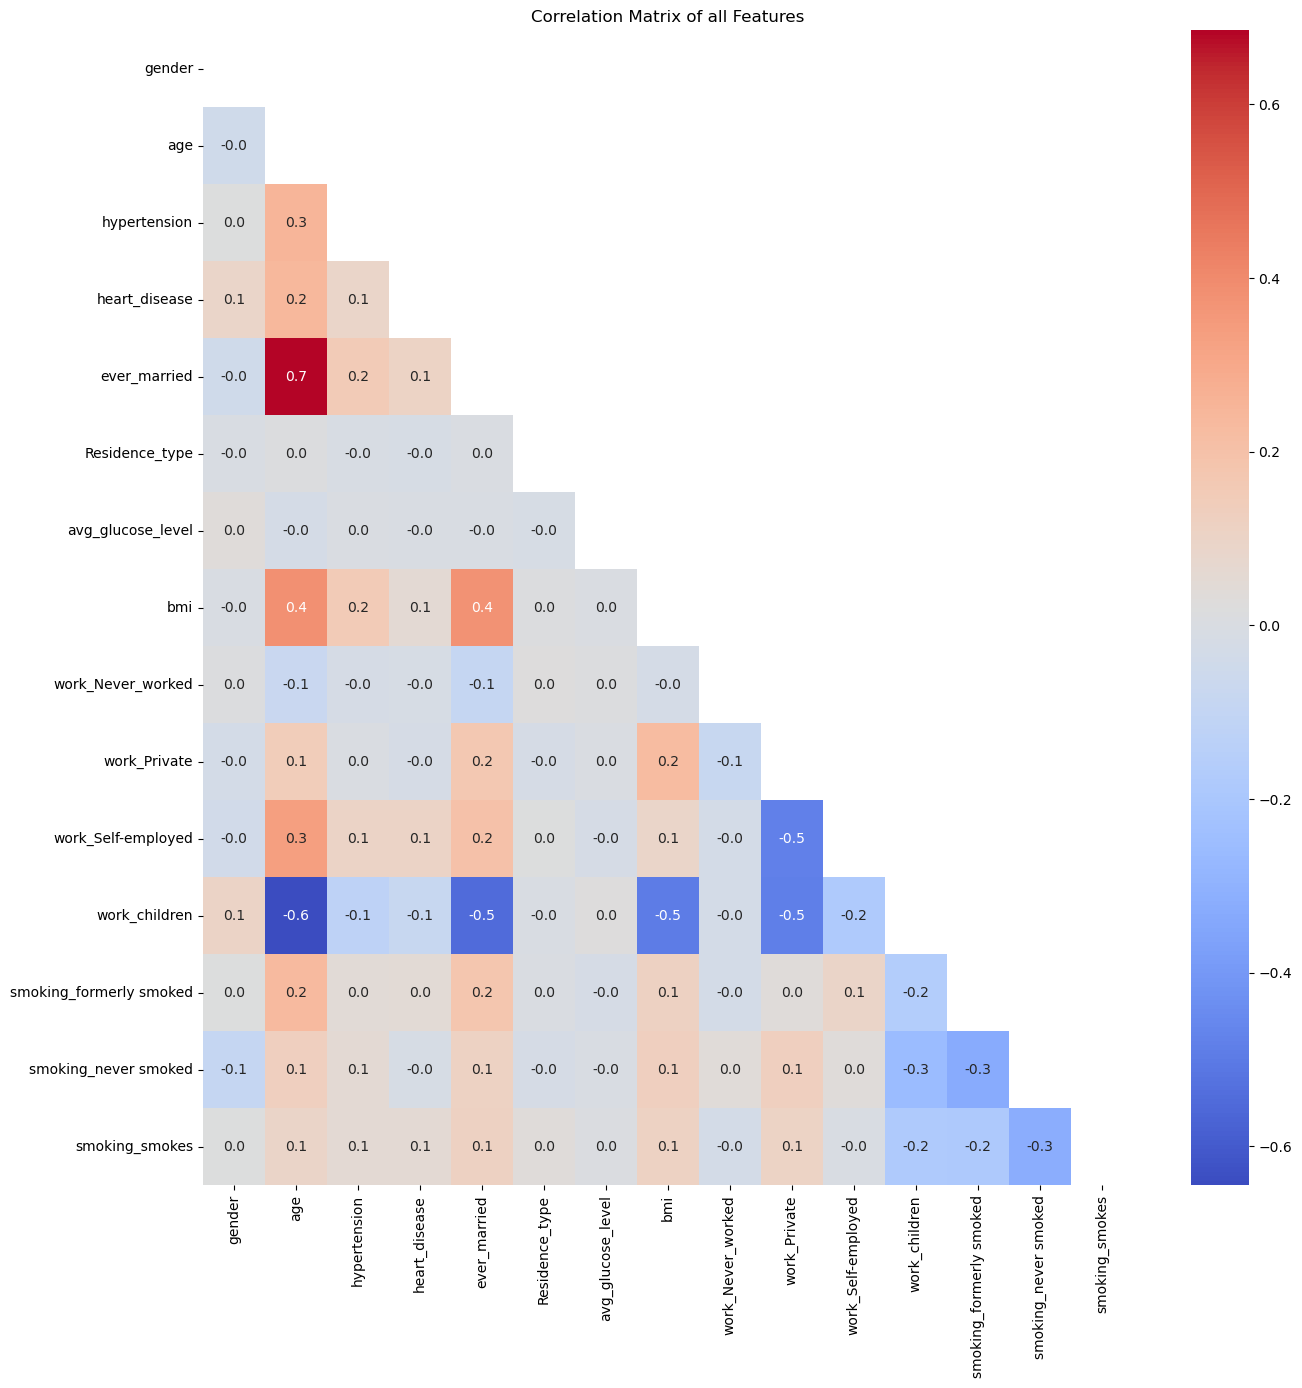

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_final.drop(columns=['stroke'], errors='ignore').corr(), cmap='coolwarm', annot=True, fmt='.1f', cbar=True, mask=np.triu(np.ones_like(df_final.drop(columns=['stroke'], errors='ignore').corr(), dtype=bool)))
plt.title("Correlation Matrix of all Features")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = df_final.drop('stroke', axis=1)
y = df_final['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y,           # ← very important with 95/5 imbalance
    shuffle=True
)

print(f"Train: {X_train.shape}  |  Positive ratio: {y_train.mean():.3f}")
print(f"Test : {X_test.shape}   |  Positive ratio: {y_test.mean():.3f}")

Train: (3506, 15)  |  Positive ratio: 0.037
Test : (877, 15)   |  Positive ratio: 0.038


In [32]:

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=8,
    min_samples_leaf=5,
    class_weight='balanced_subsample',   # handles imbalance automatically
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predictions
y_proba = rf.predict_proba(X_test)[:, 1]
y_pred_default = rf.predict(X_test)   # default threshold 0.5

In [33]:

from sklearn.metrics import precision_recall_curve, roc_auc_score
prec, rec, thresh = precision_recall_curve(y_test, y_proba)
f1 = 2 * prec * rec / (prec + rec + 1e-6)
best_idx = np.argmax(f1)
best_threshold = thresh[best_idx]

print(f"Best threshold ≈ {best_threshold:.2f}  (maximizes F1-score)")

# Apply best threshold
y_pred_optimal = (y_proba >= best_threshold).astype(int)

print("\n=== Random Forest Results (optimized threshold) ===")
print(f"AUC               : {roc_auc_score(y_test, y_proba):.4f}")
print(f"Best Threshold    : {best_threshold:.3f}")
print(classification_report(y_test, y_pred_optimal, target_names=['No Stroke', 'Stroke']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimal))

Best threshold ≈ 0.60  (maximizes F1-score)

=== Random Forest Results (optimized threshold) ===
AUC               : 0.8356
Best Threshold    : 0.603
              precision    recall  f1-score   support

   No Stroke       0.97      0.97      0.97       844
      Stroke       0.29      0.27      0.28        33

    accuracy                           0.95       877
   macro avg       0.63      0.62      0.63       877
weighted avg       0.95      0.95      0.95       877

Confusion Matrix:
[[822  22]
 [ 24   9]]


In [34]:
import joblib

# Save the model to disk
joblib.dump(rf, 'stroke_random_forest_model.pkl')

print("Model saved successfully as 'stroke_random_forest_model.pkl'")

Model saved successfully as 'stroke_random_forest_model.pkl'
